In [1]:
import graphviz as gv

def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else:
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def adjlShow(L, labels=None, directed=False, weighted=False, layout="sfdp", node_labels=None):
    g = gv.Digraph("G") if directed else gv.Graph("G")
    g.graph_attr["layout"] = layout
    g.edge_attr["color"] = "gray"
    g.node_attr["color"] = "orangered"
    g.node_attr["width"] = "0.1"
    g.node_attr["height"] = "0.1"
    g.node_attr["fontsize"] = "8"
    g.node_attr["fontcolor"] = "mediumslateblue"
    g.node_attr["fontname"] = "monospace"
    g.edge_attr["fontsize"] = "8"
    g.edge_attr["fontname"] = "monospace"

    n = len(L)

    for u in range(n):
        if labels:
            label = labels[u]
        else:
            label = str(u)
        if node_labels and u in node_labels:
            label = node_labels[u]
        g.node(str(u), label)

    added = set()

    if weighted:
        for u in range(n):
            for v, w in L[u]:
                if not directed and f"{u},{v}" not in added:
                    added.add(f"{u},{v}")
                    added.add(f"{v},{u}")
                    g.edge(str(u), str(v), str(w))
                elif directed:
                    g.edge(str(u), str(v), str(w))
    else:
        for u in range(n):
            for v in L[u]:
                if not directed and f"{u},{v}" not in added:
                    added.add(f"{u},{v}")
                    added.add(f"{v},{u}")
                    g.edge(str(u), str(v))
                elif directed:
                    g.edge(str(u), str(v))

    return g

In [6]:
%%file 2.in
1|4
2|8 7|11
3|7 5|4 8|2
4|9 5|14
5|10
6|2
7|1 8|6
0|8
7|7

Overwriting 2.in


Nodo 0: [(1, 4)]
Nodo 1: [(2, 8), (7, 11)]
Nodo 2: [(3, 7), (5, 4), (8, 2)]
Nodo 3: [(4, 9), (5, 14)]
Nodo 4: [(5, 10)]
Nodo 5: [(6, 2)]
Nodo 6: [(7, 1), (8, 6)]
Nodo 7: [(0, 8)]
Nodo 8: [(7, 7)]


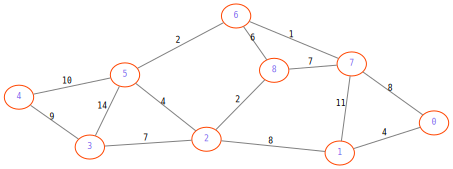

In [7]:
G, _ = readAdjl("2.in", weighted=True)

for i, edges in enumerate(G):
    print(f"Nodo {i}: {edges}")

adjlShow(G, _, weighted=True, node_labels=False)


In [8]:
def obtenerMSTPorKrukal(graph):
    numNodos = len(graph)
    bordes = []

    # saco todas las arista, su conexión y peso
    for u in range(numNodos):
        for v, peso in graph[u]:
            bordes.append((u, v, peso))

    # ordeno por peso
    bordes.sort(key=lambda edge: edge[2])

    # Acá gurdaré las aristas del mst
    mst = []
    padre = list(range(numNodos))

    def find(nodoBuscado):
        if padre[nodoBuscado] == nodoBuscado:
            return nodoBuscado
        return find(padre[nodoBuscado])

    def union(u, v):
        padreU = find(u)
        padreV = find(v)

        if padreU != padreV:
            padre[padreU] = padreV
            return True

        return False

    for u, v, peso in bordes:
        if u < numNodos and v < numNodos:
            if union(u, v) == True:
                mst.append((u, v, peso))

    return mst

In [9]:
mst = obtenerMSTPorKrukal(G)

print("Minimum Spanning Tree (MST):", mst)

costoMinimo = 0

for borde in mst:
    u, v, peso = borde
    print(f"Nodo {u} con {v} tienen peso: {peso}")
    costoMinimo += peso

print(f"Costo minimo: {costoMinimo}")

Minimum Spanning Tree (MST): [(6, 7, 1), (2, 8, 2), (5, 6, 2), (0, 1, 4), (2, 5, 4), (2, 3, 7), (1, 2, 8), (3, 4, 9)]
Nodo 6 con 7 tienen peso: 1
Nodo 2 con 8 tienen peso: 2
Nodo 5 con 6 tienen peso: 2
Nodo 0 con 1 tienen peso: 4
Nodo 2 con 5 tienen peso: 4
Nodo 2 con 3 tienen peso: 7
Nodo 1 con 2 tienen peso: 8
Nodo 3 con 4 tienen peso: 9
Costo minimo: 37


In [10]:
def adjlShowWithMST(L, mst, labels=None, directed=False, layout="sfdp", nodeLabels=None):
    g = gv.Digraph("G") if directed else gv.Graph("G")
    g.graph_attr["layout"] = layout
    g.edge_attr["color"] = "gray"
    g.node_attr["color"] = "orangered"
    g.node_attr["width"] = "0.1"
    g.node_attr["height"] = "0.1"
    g.node_attr["fontsize"] = "8"
    g.node_attr["fontcolor"] = "mediumslateblue"
    g.node_attr["fontname"] = "monospace"
    g.edge_attr["fontsize"] = "8"
    g.edge_attr["fontname"] = "monospace"
    n = len(L)

    mstAristas = set([(u, v) for u, v, _ in mst])

    for u in range(n):
        if labels:
            label = labels[u]
        else:
            label = str(u)
        if nodeLabels and u in nodeLabels:
            label = nodeLabels[u]
        g.node(str(u), label)

    added = set()

    for u in range(n):
        for v, w in L[u]:
            if not directed and not f"{u},{v}" in added:
                added.add(f"{u},{v}")
                added.add(f"{v},{u}")
                if (u, v) in mstAristas:
                    edge_color = "purple"
                    grosor = "2"
                else:
                    edge_color = "gray"
                    grosor = "0.5"
                g.edge(str(u), str(v), str(w), dir="none", penwidth=grosor, color=edge_color)

    return g

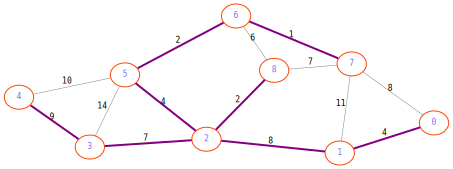

In [11]:
adjlShowWithMST(G, mst, nodeLabels=False)